# 1. Pandas 
* API : https://pandas.pydata.org/docs/reference/index.html#api
* 정형화 데이터 처리 라이브러리
* csv, Excel(표 형태)

# 2. Data Type
* Series
    * index - value
    * 하나의 데이터 타입만 올 수 있다.
    * numpy 기반으로 만들어진 Lib로써 통계 연산이 가능
* DataFrame
    * index-column-value
    * 실무에서 가장 많이 사용하는 형태

### 2-1. Series
* 형식 : class pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)

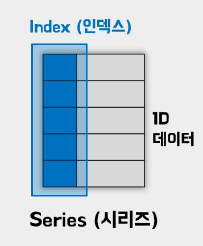

In [2]:
import pandas as pd
import numpy as np

#### 가. Series - List

In [3]:
pd.Series([10, 20, 30, 40])

0    10
1    20
2    30
3    40
dtype: int64

In [5]:
list=["펭수", "범", "임문식", "송준섭"]
pd.Series(list)

0     펭수
1      범
2    임문식
3    송준섭
dtype: object

In [8]:
""" pd.Series(["펭수", 10, 210, "EBS 연습생"], 
          index=["name", "age", "ki", "job"]) """

' pd.Series(["펭수", 10, 210, "EBS 연습생"], \n          index=["name", "age", "ki", "job"]) '

#### 나. Series - Dic

In [9]:
""" pd.Series({"name":"펭수",
           "age":10,
           "ki":210,
           "job":"EBS 연습생"}) """ 

' pd.Series({"name":"펭수",\n           "age":10,\n           "ki":210,\n           "job":"EBS 연습생"}) '

### 2-2. DataFrame
* 형식 : class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)
    * data - DataFrame을 생성할 데이터 
    * index - 각 Row에 대한 Label을 추가 (옵션) 
    * columns - 각 Columns에 대한 Label을 추가 (옵션) 
    * dtype - 각 Columns의 데이터 타입 명시 (옵션) 

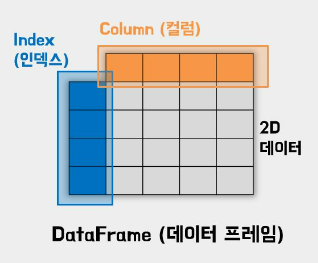

#### 가. DataFrame - List

In [11]:
pd.DataFrame([10, 20, 30, 40, 50])

,0
0,10
1,20
2,30
3,40
4,50


In [17]:
pd.DataFrame([[1000, "과자", "2021-12-31", "반품"],
              [1500, "음료", "2022-3-2", "정상"],
              [2000, "아이스크림", "2021-12-31", "반품"],
              [1000, "과자", "2021-12-31", "반품"]])

,0,1,2,3
0,1000,과자,2021-12-31,반품
1,1500,음료,2022-3-2,정상
2,2000,아이스크림,2021-12-31,반품
3,1000,과자,2021-12-31,반품


In [23]:
pd.DataFrame([[1000, "과자", "2021-12-31", "반품"],
              [1500, "음료", "2022-03-02", "정상"],
              [2000, "아이스크림", "2021-05-01", "반품"],
              [1000, "과자", "2021-11-28", "반품"]],
              columns=["가격", "종류", "판매일자", "반품여부"],
              index=["A", "B", "C", "D"])

,가격,종류,판매일자,반품여부
A,1000,과자,2021-12-31,반품
B,1500,음료,2022-03-02,정상
C,2000,아이스크림,2021-05-01,반품
D,1000,과자,2021-11-28,반품


#### 나. DataFrame - Dic

In [27]:
"""pd.DataFrame({"가격":[1000, 2000, 3000, 1000],
              "종류":["과자", "음료", "아이스크림", "과자"],
              "판매일자":["2021-12-31", "2022-03-01", "2021-05-01", "2021-11-28"],
              "반품여부":["반품", "정상", "정상", "반품"]})"""

'pd.DataFrame({"가격":[1000, 2000, 3000, 1000],\n              "종류":["과자", "음료", "아이스크림", "과자"],\n              "판매일자":["2021-12-31", "2022-03-01", "2021-05-01", "2021-11-28"],\n              "반품여부":["반품", "정상", "정상", "반품"]})'

#### 다. 열(컬럼) 출력 및 추가

In [29]:
sung=pd.DataFrame([["펭수", 100, 88, 90],
                   ["범이", 70, 80, 90],
                   ["임문식", 88, 98, 99],
                   ["송준섭", 70, 80, 70]],
                   columns=["이름", "국어", "영어", "수학"])
sung

,이름,국어,영어,수학
0,펭수,100,88,90
1,범이,70,80,90
2,임문식,88,98,99
3,송준섭,70,80,70


In [31]:
sung["이름"]

0     펭수
1     범이
2    임문식
3    송준섭
Name: 이름, dtype: object

In [32]:
sung[["이름", "국어"]]

,이름,국어
0,펭수,100
1,범이,70
2,임문식,88
3,송준섭,70


#### 라. 행(레코드) 출력 및 추가

In [33]:
sung.loc[0]

이름     펭수
국어    100
영어     88
수학     90
Name: 0, dtype: object

In [34]:
sung.loc[[0, 1]]

,이름,국어,영어,수학
0,펭수,100,88,90
1,범이,70,80,90


In [36]:
""" sung.loc[3]=["Steven", 70, 70, 70]
    sung """

' sung.loc[3]=["Steven", 70, 70, 70]\n    sung '

#### 마. 파생변수 - 열 추가

In [37]:
sung['총점']=sung['국어'] + sung['영어'] + sung['수학']
sung['평균']=sung['총점'] / 3
sung

,이름,국어,영어,수학,총점,평균
0,펭수,100,88,90,278,92.666667
1,범이,70,80,90,240,80.000000
2,임문식,88,98,99,285,95.000000
3,Steven,70,70,70,210,70.000000


### 2-2. CSV 파일 읽어 오기

#### 가. 파일 읽기 - csv
* 파일 읽기
* 데이터 수 (행 * 열)
* 데이터 요약
* 통계량 보기
* 결측치 체크 및 처리

In [39]:
sung=pd.read_csv("..\SampleData\Book\sung.csv")

In [41]:
sung.head(5)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


##### 1) 데이터 개수 확인 

In [42]:
sung.shape

(20, 5)

##### 2) 데이터 요약

In [43]:
sung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 928.0 bytes


##### 3) 데이터 통계량

In [46]:
sung.describe()

,id,nclass,math,english,science
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,3.000000,57.450000,84.900000,59.450000
std,5.91608,1.450953,20.299015,12.875517,25.292968
min,1.00000,1.000000,20.000000,56.000000,12.000000
25%,5.75000,2.000000,45.750000,78.000000,45.000000
50%,10.50000,3.000000,54.000000,86.500000,62.500000
75%,15.25000,4.000000,75.750000,98.000000,78.000000
max,20.00000,5.000000,90.000000,98.000000,98.000000


##### 4) 결측치 체크 및 처리

In [45]:
sung.isnull().sum()      # df.isnull() - True, False

id         0
nclass     0
math       0
english    0
science    0
dtype: int64

In [50]:
sung.dropna()

"""
sung.dropna(axis=0)               # row
sung.dropna(axis=1)               # columns
sung.fillna(0)                    # all zero
sung.fillna(method='ffill')	      # 뒷 행의 값으로 결측치 채우기
sung.fillna(method='bfill')	      # 앞 행의 값으로 결측치 채우기
sung.fillna(df.mean())	          # 각 열의 평균 값으로 결측치 채우기 """

"\nsung.dropna(axis=0)               # row\nsung.dropna(axis=1)               # columns\nsung.fillna(0)                    # all zero\nsung.fillna(method='ffill')\t      # 뒷 행의 값으로 결측치 채우기\nsung.fillna(method='bfill')\t      # 앞 행의 값으로 결측치 채우기\nsung.fillna(df.mean())\t          # 각 열의 평균 값으로 결측치 채우기 "

#### 나. 컬럼명 정보 확인
* 컬럼명 & 인덱스 & 값 확인
* 특정 컬럼 통계량
* 기본 연산 - 합계, 평균, 최대값, 최소값

##### 1) 컬럼명 & 인덱스 & 값 추출

In [51]:
sung.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [52]:
sung.index

RangeIndex(start=0, stop=20, step=1)

In [53]:
sung.values

array([[ 1,  1, 50, 98, 50],
       [ 2,  1, 60, 97, 60],
       [ 3,  1, 45, 86, 78],
       [ 4,  1, 30, 98, 58],
       [ 5,  2, 25, 80, 65],
       [ 6,  2, 50, 89, 98],
       [ 7,  2, 80, 90, 45],
       [ 8,  2, 90, 78, 25],
       [ 9,  3, 20, 98, 15],
       [10,  3, 50, 98, 45],
       [11,  3, 65, 65, 65],
       [12,  3, 45, 85, 32],
       [13,  4, 46, 98, 65],
       [14,  4, 48, 87, 12],
       [15,  4, 75, 56, 78],
       [16,  4, 58, 98, 65],
       [17,  5, 65, 68, 98],
       [18,  5, 80, 78, 90],
       [19,  5, 89, 68, 87],
       [20,  5, 78, 83, 58]], dtype=int64)

In [55]:
sung["math"].head(3)

0    50
1    60
2    45
Name: math, dtype: int64

In [56]:
sung["math"].describe()

count    20.000000
mean     57.450000
std      20.299015
min      20.000000
25%      45.750000
50%      54.000000
75%      75.750000
max      90.000000
Name: math, dtype: float64

In [57]:
sung["math"].sum()

1149

In [58]:
sung["math"].mean()

57.45

In [59]:
sung["math"].max()

90

In [60]:
sung["math"].min()

20

##### 2) 특정 범위 검색 - loc, Slicing 

In [61]:
copy_sung=sung

In [64]:
copy_sung.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [63]:
copy_sung[["id", "nclass"]].tail()

,id,nclass
15,16,4
16,17,5
17,18,5
18,19,5
19,20,5


* loc : loc[행, 열]
    * 문자(labeling)을 통해서 값을 찾는다.
* iloc : iloc[행, 열]
    * 행번호(Integer position)를 통해서 값을 찾는다.
    
* 인덱스는 삭제 가능하지만, 행번호는 고유의 값으로 삭제되지 않습니다. <br/>
(참조 : https://bohemihan.tistory.com/entry/Pandas-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%84%A0%ED%83%9D%ED%95%98%EA%B8%B0-loc-iloc)

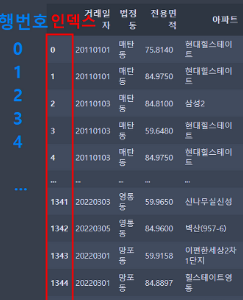

In [67]:
copy_sung.loc[1]

id          2
nclass      1
math       60
english    97
science    60
Name: 1, dtype: int64

In [68]:
copy_sung.loc[5:10]

,id,nclass,math,english,science
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [70]:
copy_sung[15:]

,id,nclass,math,english,science
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [71]:
copy_sung[:15]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [72]:
copy_sung.loc[10:15, "id"]

10    11
11    12
12    13
13    14
14    15
15    16
Name: id, dtype: int64

In [73]:
copy_sung.loc[12:13, "id":"english"]

,id,nclass,math,english
12,13,4,46,98
13,14,4,48,87


In [74]:
copy_sung.loc[:, "english":]

,english,science
0,98,50
1,97,60
2,86,78
3,98,58
4,80,65
5,89,98
6,90,45
7,78,25
8,98,15
9,98,45


##### 3) 삭제

In [78]:
copy_sung.drop(['science'], axis=1).head()

,id,nclass,math,english
0,1,1,50,98
1,2,1,60,97
2,3,1,45,86
3,4,1,30,98
4,5,2,25,80


In [81]:
copy_sung.drop([5])          # axis=0 생략가능

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


#### 다. Filtering
* query()
* np.where()

##### 1) query()

In [83]:
copy_sung.query("nclass==1").head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [84]:
copy_sung.query("nclass==1 | nclass==2").head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [85]:
copy_sung.query("math >=50 & math <=80")

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
5,6,2,50,89,98
6,7,2,80,90,45
9,10,3,50,98,45
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90


In [86]:
copy_sung.query("math >=50")[["id", "math"]].head()

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90


In [87]:
copy_sung['total']=sung['math']+sung['english']+sung['science']
copy_sung['average']=copy_sung['total']/3

In [88]:
copy_sung.head()

,id,nclass,math,english,science,total,average
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667


##### 2) np.where()

In [89]:
copy_sung['합격여부']=np.where(copy_sung['average'] >=60, '합격', '불합격')

In [90]:
copy_sung.head()

,id,nclass,math,english,science,total,average,합격여부
0,1,1,50,98,50,198,66.000000,합격
1,2,1,60,97,60,217,72.333333,합격
2,3,1,45,86,78,209,69.666667,합격
3,4,1,30,98,58,186,62.000000,합격
4,5,2,25,80,65,170,56.666667,불합격
